In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(512, 512)


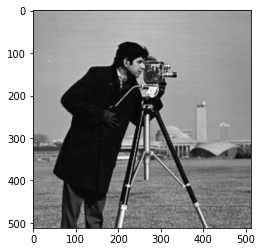

In [48]:
p=input("enter path of cover image")
cover=cv2.imread('images/'+p,0)
print(cover.shape)
plt.imshow(cover,cmap='gray')
plt.show()

(256, 256)


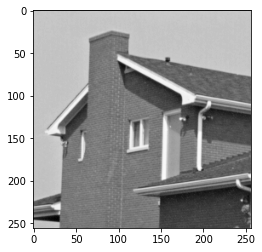

In [59]:
#msg=cv2.imread('images/GRAY_8BIT_100x100/'+input("enter path of message image"),0)
msg=cv2.imread('images/'+input("enter path of message image"),0)
print(msg.shape)
plt.imshow(msg,cmap='gray')
plt.show()

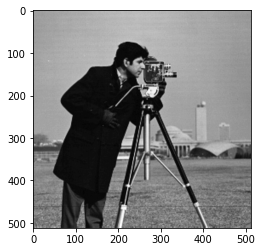

array([[157, 156, 158, ..., 152, 154, 154],
       [153, 156, 158, ..., 152, 150, 148],
       [158, 159, 159, ..., 152, 148, 148],
       ...,
       [121, 123, 129, ..., 126, 118, 105],
       [122, 119, 126, ..., 130, 119, 105],
       [125, 123, 125, ..., 114, 109, 118]], dtype=uint8)

In [62]:
def stego_LSB(cover,msg,bits):
    if (cover.shape[0]*cover.shape[1])<((msg.shape[0]*msg.shape[1]*8)/bits):
        print('message is too large')
        return
    msg1d=msg.flatten()
    cover1d=cover.flatten()
    msg_bin=''
    for i in msg1d:
        msg_bin+=format(int(i),'08b')
    n=len(msg_bin)
    mbt=0
    for i in range(cover1d.shape[0]):
        bt=format(int(cover1d[i]),'08b')
        ad=msg_bin[mbt:mbt+bits]
        if ad=='':
            break
        bt=bt[:8-bits]+ad
        mbt+=bits
        cover1d[i]=int(bt,2)
    cover_stego=cover1d.reshape(cover.shape)
    plt.imshow(cover_stego,cmap='gray')
    plt.show()
    return cover_stego


stego_LSB(cover,msg,2)